<a href="https://colab.research.google.com/github/mwithgod3952/Conquering-Kaggle-s-challenge/blob/main/Marketing_Analytics_Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = 4>Data preparation</font>

In [ ]:
# font
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
 # Basic environment
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
    ITALIC = '\x1B'

# drive
from google.colab import drive; drive.mount('/content/drive', force_remount=True)

# path
import os

org_pth = '/content/drive/MyDrive'
_new_pth = [x for x in os.listdir(org_pth) if x.startswith('Cohort')][0]
new_pth = f'{org_pth}/{_new_pth}' 

if new_pth.startswith('/content') and new_pth.endswith('practice'):
    os.chdir(new_pth)
    wp = os.getcwd()
    print(f'\t\n {new_pth}')

Mounted at /content/drive
	
 /content/drive/MyDrive/Cohort_Analysis_practice


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files; files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jhleekr","key":"740259ff05a1aa87d388c6ecd1153f10"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d carrie1/ecommerce-data
!kaggle datasets download -d mustafacicek/online-retail-final

print('\n')

!unzip ecommerce-data
!unzip online-retail-final

  0% 0.00/7.20M [00:00<?, ?B/s]
100% 7.20M/7.20M [00:00<00:00, 121MB/s]
  0% 0.00/6.30M [00:00<?, ?B/s]
100% 6.30M/6.30M [00:00<00:00, 154MB/s]


Archive:  ecommerce-data.zip
  inflating: data.csv                
Archive:  online-retail-final.zip
  inflating: online_retail_final.csv  


In [2]:
dataset = [x for x in os.listdir(wp) if x.endswith('.csv')]
print(dataset)

['data.csv', 'online_retail_final.csv']


<font size = 4>Library</font>

In [42]:
# analyzation
import re
import ast
import random
import numpy as np
import pandas as pd
from numpy import asarray
from multiprocessing import Pool
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rc('font', family='NanumBarunGothic') 
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from google.colab import data_table

# options
pd.options.mode.chained_assignment = None
import warnings 
warnings.filterwarnings('ignore')

In [4]:
import multiprocessing as mp; print('\n\t - number of CPUs available', mp.cpu_count())


	 - number of CPUs available 8


In [5]:
df1 = pd.read_csv(f'{wp}/{dataset[0]}', encoding= 'unicode_escape')
df1.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
print(f'\t\n {color.BOLD}Shape : {df1.shape}{color.END} \n')

print(f'{color.BOLD}- NULL{color.END}')
print(df1.isnull().sum())
print('\n')

	
 Shape : (541909, 8) 

- NULL
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64




In [7]:
df1[df1.Description.isnull()].iloc[:2, :]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom


In [8]:
des_nullDf = df1[df1.Description.isnull()].reset_index( drop=True )

In [9]:
if len(des_nullDf) == des_nullDf.CustomerID.isnull().sum():
    print('T')
else:
    print('F')

T


In [10]:
des_nullDf.UnitPrice.value_counts()

0.0    1454
Name: UnitPrice, dtype: int64

<font size = 2>상위의 과정을 통해 "Description" 열에 포함된 내용이 없을 때 "CustomerID" 정보 역시 누락되어 있음을 확인하였습니다, 더불어, "UnitPrice"는 0임을 확하였습니다.</font>

In [11]:
des_notnullDf = df1[df1.Description.notnull()].reset_index( drop=True )
ID_NULL_cnt = des_notnullDf.CustomerID.isnull().sum()
print(f'\n\t {color.BOLD}- "Description"정보가 확인되나, ID 정보가 누락된 경우의 수 : {ID_NULL_cnt}{color.END}')


	 - "Description"정보가 확인되나, ID 정보가 누락된 경우의 수 : 133626


In [12]:
df1 = df1[df1.Description.notnull() & df1.CustomerID.notnull()]
df1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
df1.loc[df1['InvoiceNo'].apply(lambda x: str('Y') if re.search('[a-zA-Z]+', x) else str('N')) == 'Y', 'InvoiceNo'].apply(lambda x: str(x)[0]).unique()

array(['C'], dtype=object)

In [14]:
wC  = df1[df1['InvoiceNo'].apply(lambda x: x.startswith('C'))]
nwC = df1[df1['InvoiceNo'].apply(lambda x: True if len(set('AC') & set(x)) == 0 else False)]
if (len(wC) == sum(wC.Quantity < 0)) and (len(nwC) == sum(nwC.Quantity >= 0)):
    print('T')
else:
    print('N')    

T


<font size = 2>'InvoiceNO'정보 값 중 특정 값에 알파벳 값이 결합된 경우를 발견하여 확인해본 결과, 일반 정수값 번호 외에 'C'와 'A'가 결합된 경우를 확인하였습니다.</font>

<font size = 2>그 중, 'C'로 구분한 Quantity값이 모두 음수 인 것을 확인하였고 더불어, Quantity값이 음수이나 'InvoiceNO'값이 잘못 구분된 케이스 역시 없음으로, 취소된 주문건을 구분하기 위한 구분자임을 확신할 수 있습니다.</font>


<font size = 2>우선 'Cancelled'라는 열을 만들어 주문취소가 포함된 행을 1로 나머지 행을 0으로 구분합니다.</font>


In [15]:
df1.loc[wC.index, 'Cancelled'] = int(1); df1.loc[df1.Cancelled.isnull(), 'Cancelled'] = int(0)

<font size = 2>아래부터는 주문건에 대한 정보만을을 취합하여 분석을 진행하겠습니다.</font>

In [16]:
_df1 = df1[df1.Cancelled == 0]
_df1.Cancelled.value_counts()

0.0    397924
Name: Cancelled, dtype: int64

In [17]:
_df1 = _df1[~ _df1['StockCode'].str.contains("^[a-zA-Z]")]
_df1.loc[:, 'Description'] = list(_df1.Description.str.lower())

In [26]:
_df1 = _df1[_df1.UnitPrice > 0]

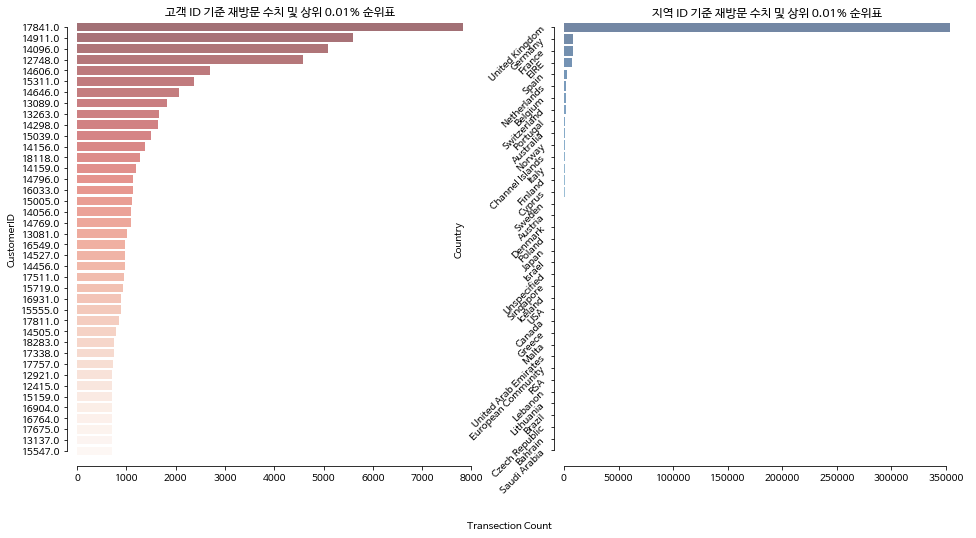

In [27]:
print('\n')
fig, axes = plt.subplots( 1, 2, figsize=(16, 8) )
ax = axes.flatten()
i = 0; rt = 0.01

for colN, topicN, clr in [['CustomerID', '고객', 'Reds_r'], ['Country', '지역', 'Blues_r']]:

    Y = _df1[colN].value_counts().sort_values(ascending=False).head(round((len(_df1) / 100)*rt))
    c = sns.barplot(y=Y.index, x=Y.values, orient='h', ax=ax[i], order=Y.index, palette=clr, alpha=0.6)
    c.set_title(f'{topicN} ID 기준 재방문 수치 및 상위 {rt}% 순위표')
    c.set_ylabel(colN)
    i += 1    

fig.text(0.5, 0.001, 'Transection Count', ha='center')
sns.despine(offset=10, trim=True)

plt.setp(ax[1].get_yticklabels(), rotation=45, ha="right")
plt.show()

<font size = 2>위의 분석을 통해 고객 및 지역 기준 재방문 수를 확인할 수 있습니다.</font>

<font size = 2>고객의 경우 약 4000번을 기준으로 상위그룹이 구분됨을 알수 있습니다. 지역의 경우 영국이 독보적으로 높다는 것을 알 수 있습니다.</font>




---

<font size = 2>단가 표준편차의 평균 이상의 "StockCode"만을 추가로 선별하겠습니다.</font>

In [28]:
# preprocessing
price_nunq  = _df1.groupby('StockCode').UnitPrice.nunique()
over3_codes = list(set(price_nunq[price_nunq >= 3].index))
indexes = list(map(lambda x: np.where(_df1.reset_index(drop=True).StockCode == x)[0].tolist(), over3_codes)); m_indexes = sum(indexes, [])

over3_df = _df1.reset_index(drop=True).iloc[sorted(m_indexes)].reset_index(drop=True)
over3_df.loc[:, 'InvoiceDate'] = over3_df.InvoiceDate.apply(lambda x: pd.to_datetime(x))
over3_dfFv = over3_df.loc[:, ['InvoiceDate', 'StockCode',	'Quantity',	'UnitPrice']].copy()

# visualization
_, c_items = zip(*matplotlib.colors.cnames.items())
random.seed(2022)
c_items = [random.choice(c_items) for x in range(len(over3_dfFv.StockCode.unique()))]

def ts_vis(target_col='UnitPrice'):
    var_avg = np.mean(over3_dfFv.groupby(['StockCode'])[target_col].apply(lambda x: np.var(x)).sort_values(ascending=False))
    
    fig  = plt.figure( figsize=(16, 6) )
    axes = [plt.subplot2grid((1, 3), (0, 0), colspan=2), plt.subplot2grid((1, 3), (0, 2))]
    i = 0
    for key, gr in over3_dfFv.groupby(by='StockCode'):
        if np.var(gr[target_col]) > var_avg:
            lab = key
        else:
            lab = None
        axes[0].bar(gr.InvoiceDate, gr[target_col], color=c_items[i], label=lab, alpha=0.4)
        i += 1

    axes[0].legend(loc='upper left')
    axes[0].set_title(f'{target_col}의 변화 및 StockCode별 표준편차가 이의 평균을 넘어서는 상품을 분류')
    axes[0].set_xlabel('TIme')
    axes[0].set_ylim(0, round(np.max(over3_dfFv[target_col])) * 1.25)
    axes[0].set_ylabel(target_col)

    axes[1].boxplot(over3_dfFv[target_col])
    axes[1].set_title(f"Boxplot for {target_col}")
    
    for j in range(2):
        axes[j].grid()
        for label in axes[j].get_xticklabels(which='major'):
            label.set(rotation=45, horizontalalignment='right')

    fig.tight_layout()

    return plt.show()    

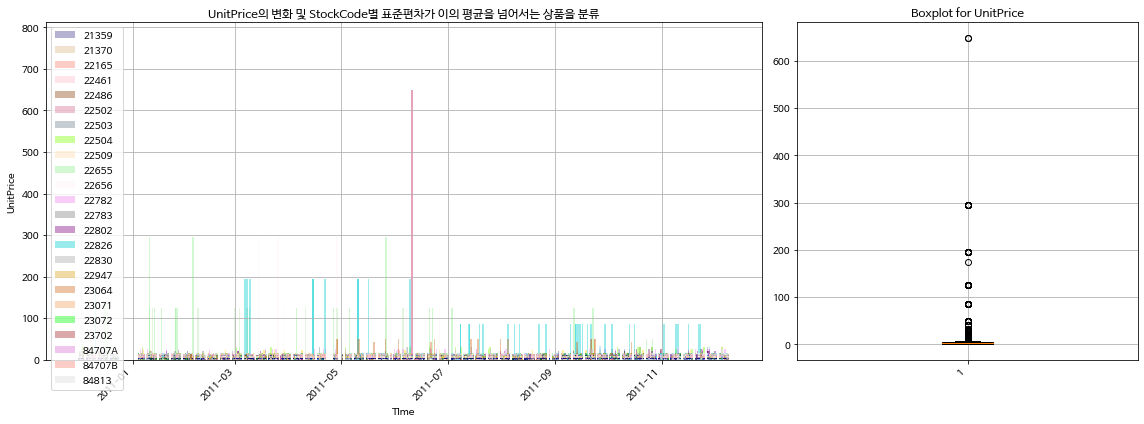

In [20]:
print('\n')
ts_vis(target_col='UnitPrice')

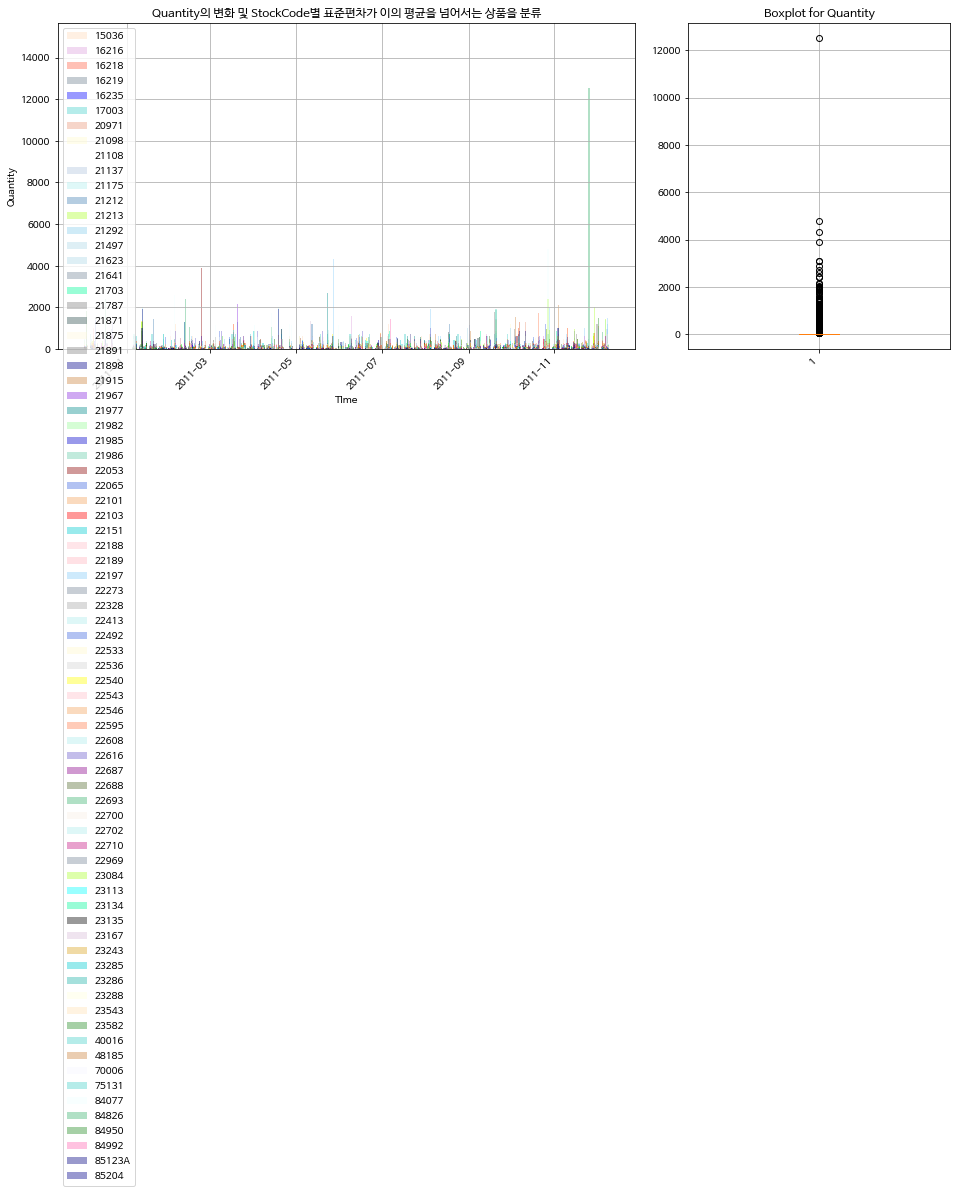

In [21]:
print('\n')
ts_vis(target_col='Quantity')

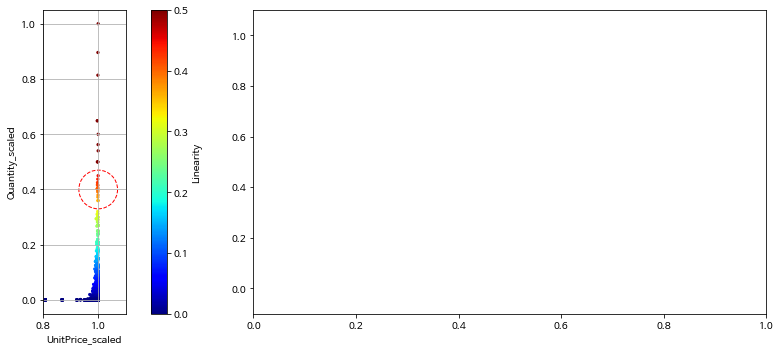

In [75]:
price_quant = over3_dfFv.loc[:, ['UnitPrice', 'Quantity']].values.tolist()
scaler = MinMaxScaler()
scaler.fit(price_quant)
price_quant_new = scaler.transform(price_quant); a, b = zip(*price_quant_new); a = pd.Series(a)

price_quant_newDF = pd.DataFrame( columns=['UnitPrice_scaled', 'Quantity_scaled'] )
a[a > 0] = 1 - a; price_quant_newDF.iloc[:, 0] = a
price_quant_newDF.iloc[:, 1] = b; price_quant_newDF = price_quant_newDF[price_quant_newDF.UnitPrice_scaled > 0].reset_index(drop=True).copy()

# ---
comparison  = (price_quant_newDF.iloc[:, 0] >= price_quant_newDF.iloc[:, 1])
rise1_run0 = np.where(comparison == True )[0]
rise0_run1 = np.where(comparison == False)[0]
price_quant_newDF.loc[rise1_run0, 'Linearity'] = price_quant_newDF.iloc[rise1_run0, 1]/price_quant_newDF.iloc[rise1_run0, 0]
price_quant_newDF.loc[rise0_run1, 'Linearity'] = price_quant_newDF.iloc[rise0_run1, 0]/price_quant_newDF.iloc[rise0_run1, 1]

# price_quant_newDF.loc[:, 'Linearity'] = price_quant_newDF.iloc[:, 1]/price_quant_newDF.iloc[:, 0]
# ---

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
price_quant_newDF.plot(kind='scatter', x='UnitPrice_scaled', y='Quantity_scaled',
                       c='Linearity', ax=axes[0], cmap='jet', vmin=0, vmax=0.5, s=5)

c = plt.Circle((1, 0.4), 0.07, fill=False, color='r', ls='--')
axes[0].set_aspect(1)
axes[0].add_artist(c)

axes[0].set_xlim(0.8,1.1); plt.ylim(-0.1,1.1)
axes[0].grid(True)
plt.tight_layout()